In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from xgboost import XGBRegressor, XGBRFRegressor, DMatrix, cv
from sklearn.model_selection import train_test_split


from sklearn.decomposition import PCA

%matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
X.dayofweek.value_counts()

6    5016
5    5016
4    5016
3    5016
0    5016
2    4992
1    4992
Name: dayofweek, dtype: int64

In [98]:
from src.pipelines import *

In [99]:
X_TRAIN_PATH = '../Case_material/train/X_train.csv'
Y_TRAIN_PATH = '../Case_material/train/y_train.csv'

X = pd.read_csv(X_TRAIN_PATH)
y = pd.read_csv(Y_TRAIN_PATH)

add_time(X)
add_hour_weekday_month(X)
add_hour_batches(X)
add_weekend(X)
add_business_hour(X)
add_siesta(X)
add_holidays_spain(X)
normalize(X)
add_city_weight(X)


X.drop(columns=['ValueDateTimeUTC', 'time', 'date'], inplace=True)
y.drop(columns=['ValueDateTimeUTC'], inplace=True)

# Uncomment for PCA
# pca = PCA(n_components=25)
# pca.fit(X)
# X = pca.transform(X)




In [51]:
n_estimators = 999
params = {
    # Parameters that we are going to tune.
    'max_depth':10,
    'min_child_weight': 2,
    'learning_rate':.005,
    'subsample': 2,
    'colsample_bytree': 1,
    # Other parameters
    # 'objective':'reg:linear',
}

In [100]:
n_estimators = 2000
params = {
    # Parameters that we are going to tune.
'learning_rate': 0.13872832647046318, 'max_depth': 7
    # Other parameters
#     'objective':'reg:squarederror'
#     'objective':'reg:linear',
#     'eval_metric':'mape'
}

xgb_model = XGBRegressor(
    **params,
    n_estimators=n_estimators)
# print(xgb_models)

split_frac=0.9
X_train = X[:int(X.shape[0]*split_frac)]
X_test = X[int(X.shape[0]*split_frac):]
y_train = y[:int(X.shape[0]*split_frac)]
y_test = y[int(X.shape[0]*split_frac):]

i = 1
score = []


fit = xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=50)


[0]	validation_0-rmse:25025.23047	validation_1-rmse:24865.06055
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:21575.84180	validation_1-rmse:21445.03711
[2]	validation_0-rmse:18605.80859	validation_1-rmse:18515.00391
[3]	validation_0-rmse:16048.72656	validation_1-rmse:15992.02832
[4]	validation_0-rmse:13846.88477	validation_1-rmse:13820.07715
[5]	validation_0-rmse:11952.98535	validation_1-rmse:11963.97461
[6]	validation_0-rmse:10322.06934	validation_1-rmse:10366.51953
[7]	validation_0-rmse:8918.57715	validation_1-rmse:8985.36719
[8]	validation_0-rmse:7712.72168	validation_1-rmse:7794.97852
[9]	validation_0-rmse:6676.22217	validation_1-rmse:6775.14893
[10]	validation_0-rmse:5785.90576	validation_1-rmse:5892.62549
[11]	validation_0-rmse:5022.23389	validation_1-rmse:5141.64355
[12]	validation_0-rmse:4366.04785	validation_1-rmse:4498.23584
[13]	validation_0-

[131]	validation_0-rmse:387.85550	validation_1-rmse:928.86566
[132]	validation_0-rmse:386.31992	validation_1-rmse:930.47803
[133]	validation_0-rmse:385.33597	validation_1-rmse:930.50555
[134]	validation_0-rmse:384.52862	validation_1-rmse:930.45215
[135]	validation_0-rmse:383.55350	validation_1-rmse:930.88391
[136]	validation_0-rmse:380.88538	validation_1-rmse:930.26666
[137]	validation_0-rmse:379.13513	validation_1-rmse:930.27881
[138]	validation_0-rmse:377.66043	validation_1-rmse:930.28223
[139]	validation_0-rmse:376.98676	validation_1-rmse:929.99774
[140]	validation_0-rmse:376.53766	validation_1-rmse:930.14325
[141]	validation_0-rmse:375.85071	validation_1-rmse:930.46606
[142]	validation_0-rmse:375.53424	validation_1-rmse:930.43536
[143]	validation_0-rmse:374.61703	validation_1-rmse:931.28253
[144]	validation_0-rmse:372.57834	validation_1-rmse:933.77423
[145]	validation_0-rmse:371.81256	validation_1-rmse:933.80139
[146]	validation_0-rmse:371.09827	validation_1-rmse:933.55750
[147]	va

In [54]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
import numpy as np
from scipy.stats import uniform, loguniform, randint


xgb_model = xgb.XGBRegressor()
param_search = {
                'max_depth' :randint(5, 20),
                #'min_child_weight': [0.5, 1],
                'learning_rate':loguniform(1e-4, 1e0)
                #'subsample': [1],
               # 'colsample_bytree': [1]
               }

split_frac=0.9
X_train = X[:int(X.shape[0]*split_frac)]
X_test = X[int(X.shape[0]*split_frac):]
y_train = y[:int(X.shape[0]*split_frac)]
y_test = y[int(X.shape[0]*split_frac):]

tscv = TimeSeriesSplit(n_splits=20)
rsearch = RandomizedSearchCV(estimator=xgb_model, cv=tscv,
                        param_distributions=param_search)
xgb_model = rsearch.fit(X_train, y_train)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

test_preds = xgb_model.predict(X_test)

print('MSE:', round(mean_squared_error(y_test.to_numpy(), 
                                       test_preds.reshape((-1, 1))),2))
print('R^2:', round(r2_score(y_test.to_numpy(), test_preds.reshape((-1, 1))), 2))

mape = np.mean(np.abs((y_test.to_numpy() - test_preds.reshape((-1,1))) / 
                      np.abs(y_test.to_numpy())))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

MSE: 862791.42
R^2: 0.96
Mean Absolute Percentage Error (MAPE): 2.5
Accuracy: 97.5


In [19]:
(y_test.to_numpy()**2).sum()/len(y_test)

# 'MSE:', round(((y_test.to_numpy()**2).sum())/len(y_test)

830037845.8373657

In [56]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [57]:
report(xgb_model.cv_results_)

Model with rank: 1
Mean validation score: 0.790 (std: 0.091)
Parameters: {'learning_rate': 0.06216857201227376, 'max_depth': 5}

Model with rank: 2
Mean validation score: 0.738 (std: 0.118)
Parameters: {'learning_rate': 0.20975057687625195, 'max_depth': 18}

Model with rank: 3
Mean validation score: 0.710 (std: 0.126)
Parameters: {'learning_rate': 0.41722764881385277, 'max_depth': 14}



In [73]:
cols = ['hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'hour3',
       'business hour', 'siesta', 'holidays']

X['dayofweek'].sum()

10032

<IPython.core.display.Javascript object>


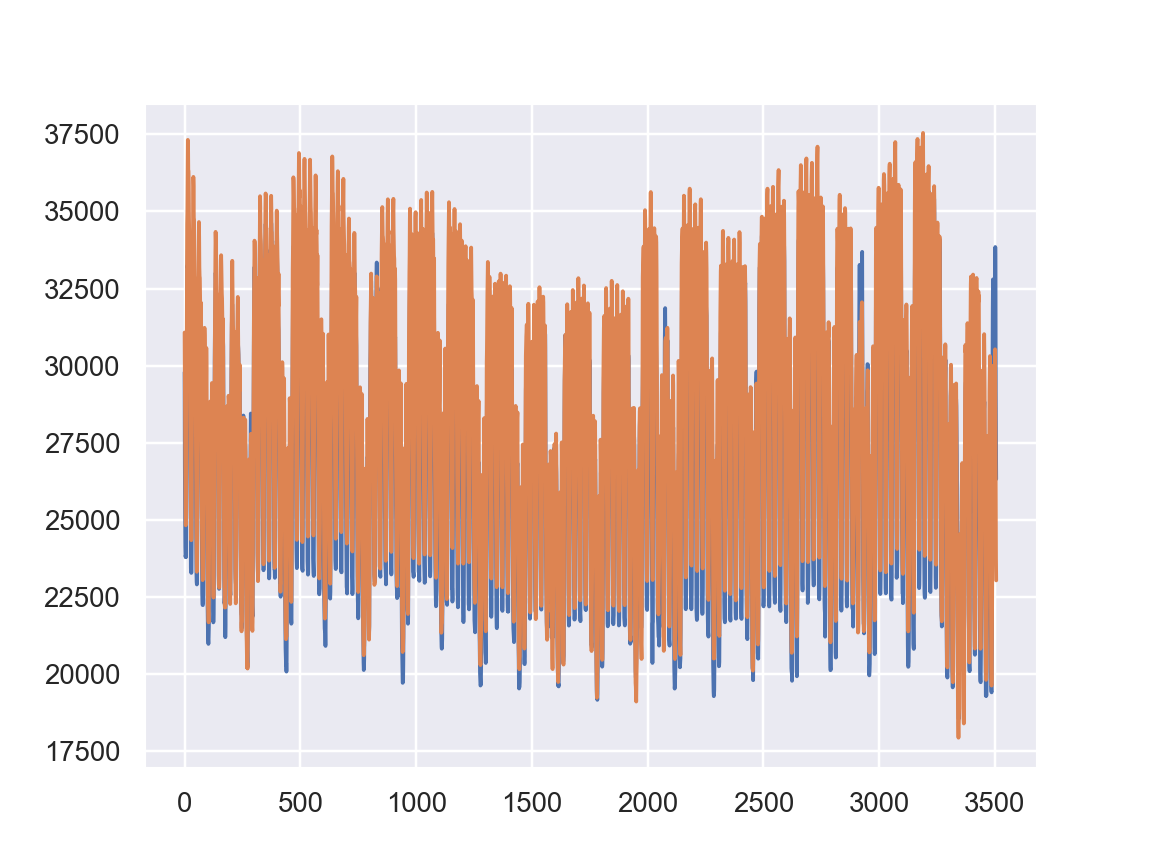

In [31]:
%matplotlib notebook

plt.figure()
plt.plot(test_preds)
plt.plot(y_test.to_numpy())

<IPython.core.display.Javascript object>


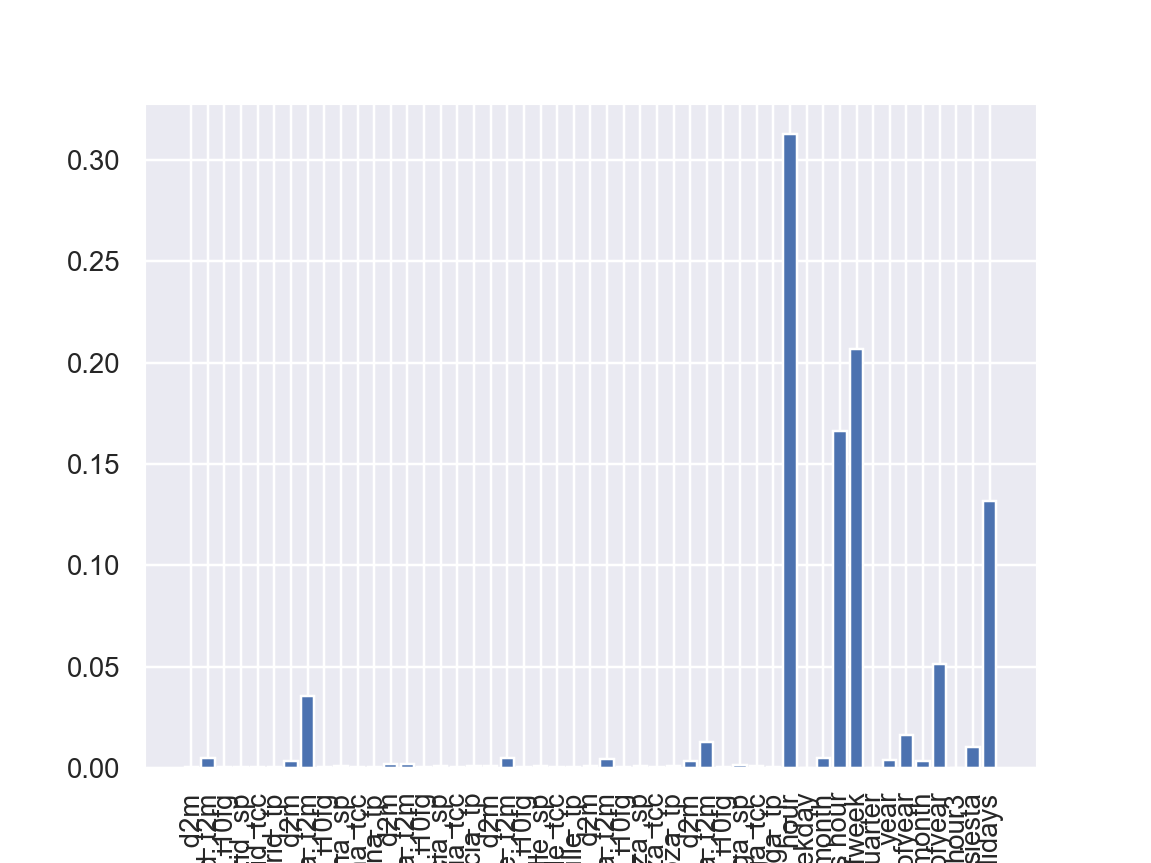

In [57]:
plt.figure()
plt.bar(X.columns, xgb_model.feature_importances_)
plt.xticks(rotation=90);

In [42]:
dtrain = DMatrix(X, label=y)

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    # 'objective':'reg:linear',
}

cv_results = cv(
    params,
    dtrain,
    num_boost_round=999,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,20054.254687,8.332968,20053.659766,37.903076
1,14045.319727,5.477629,14045.809570,33.064864
2,9839.435742,4.102206,9840.507227,24.973668
3,6908.672949,2.544082,6912.009277,21.503576
4,4883.484375,2.277332,4889.534180,17.110941
...,...,...,...,...
911,72.269350,0.723414,630.301746,6.364144
912,72.136642,0.734580,630.270618,6.373748
913,71.980199,0.758214,630.237940,6.358310
914,71.809811,0.788976,630.202307,6.345684


In [51]:
# random search linear regression model on the auto insurance dataset
from scipy.stats import loguniform
from pandas import read_csv

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
# load dataset



# define model
n_estimators = 999
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'learning_rate':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    # 'objective':'reg:linear',
}
model = XGBRegressor(
    **params,
    n_estimators=n_estimators)
# fit = xgb_model.fit(
#     X_train,
#     y_train,
#     eval_set=[(X_train, y_train), (X_test, y_test)],
#     early_stopping_rounds=20)



# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['max_depth'] = [5, 10, 20, 50, 100]
space['learning_rate'] = loguniform(1e-5, 1e-2)
# space['fit_intercept'] = [True, False]
# space['normalize'] = [True, False]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y, verbose=True)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

KeyboardInterrupt: 

In [41]:
# CROSSVAL

from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
xgb = XGBRegressor()

score = -1 * cross_val_score(xgb, X, y, cv=kfold, scoring='neg_mean_squared_error').mean()

score

1131763.5322154402

In [ ]:
xgb_model.feature_importances_

In [ ]:
%matplotlib notebook

plt.bar(X_train.columns, xgb_model.feature_importances_)
plt.xticks(rotation=90)